<a href="https://colab.research.google.com/github/jabarsaleem/Movie-recommender-system/blob/master/recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 2.4MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675736 sha256=b6a3c4279db111f14c80c55eb9faebb65f07d393b4aa1cb8e73b7b0d3b712558
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:

df2 = pd.read_csv('/content/drive/My Drive/recommender system/tmdb_5000_movies.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/recommender system/tmdb_5000_credits.csv')


In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
df2.groupby('title')['vote_average'].mean().sort_values(ascending=False).head()

title
Me You and Five Bucks    10.0
Dancer, Texas Pop. 81    10.0
Stiff Upper Lips         10.0
Little Big Top           10.0
Sardaarji                 9.5
Name: vote_average, dtype: float64

In [ ]:
df2.groupby('title')['vote_average'].count().sort_values(ascending=False).head()

title
Out of the Blue       2
Batman                2
The Host              2
Æon Flux              1
Hearts in Atlantis    1
Name: vote_average, dtype: int64

In [ ]:
ratings = pd.DataFrame(df2.groupby('title')['vote_average'].mean().sort_values(ascending=False))
ratings.head()

,vote_average
title,
Me You and Five Bucks,10.0
"Dancer, Texas Pop. 81",10.0
Stiff Upper Lips,10.0
Little Big Top,10.0
Sardaarji,9.5


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

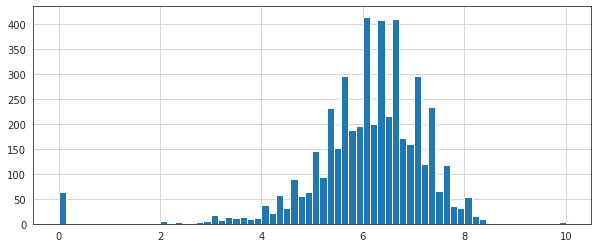

In [ ]:
plt.figure(figsize=(10,4))
ratings['vote_average'].hist(bins=70)


In [ ]:
C= df2['vote_average'].mean()
C

6.092171559442011

In [ ]:
m= df2['vote_count'].quantile(0.95)
m

3040.8999999999996

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape
v=df2['vote_count']

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


In [ ]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score','popularity']].head(15)

,title,vote_count,vote_average,score,popularity
1881,The Shawshank Redemption,8205,8.5,7.848921,136.747729
65,The Dark Knight,12002,8.2,7.773906,187.322927
662,Fight Club,9413,8.3,7.760909,146.757391
96,Inception,13752,8.1,7.736417,167.583710
3232,Pulp Fiction,8428,8.3,7.714609,121.463076
95,Interstellar,10867,8.1,7.660997,724.247784
809,Forrest Gump,7927,8.2,7.615595,138.133331
3337,The Godfather,5893,8.4,7.614467,143.659698
329,The Lord of the Rings: The Return of the King,8064,8.1,7.550188,123.630332
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.506082,138.049577


Text(0.5, 1.0, 'Popular Movies')

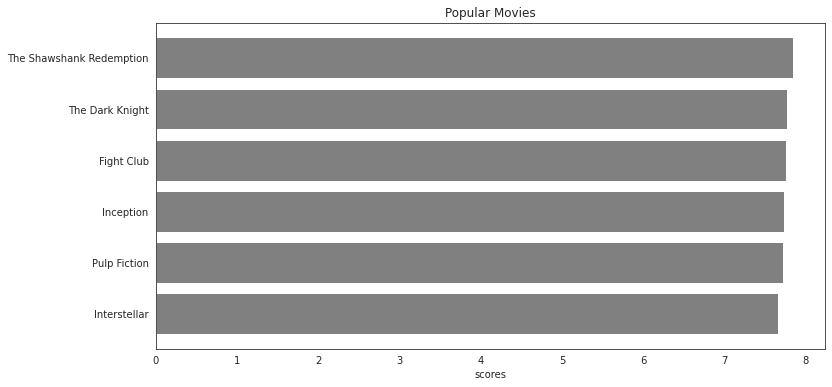

In [ ]:
pop= q_movies.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='grey')
plt.gca().invert_yaxis()
plt.xlabel("scores")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Popular Movies')

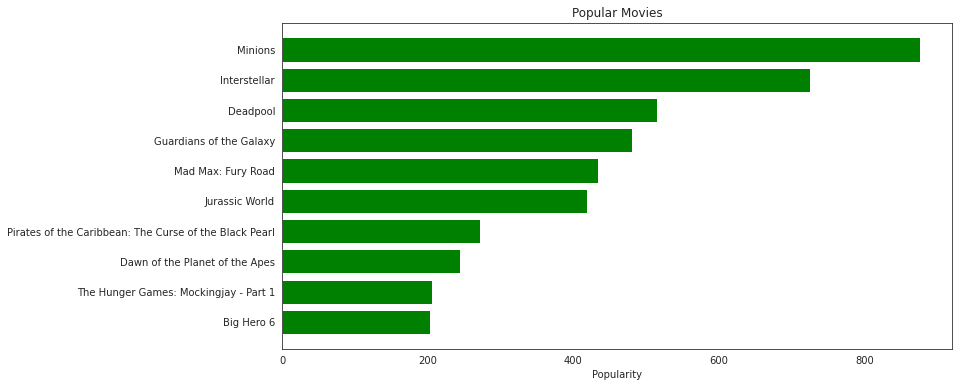

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df2['overview'] = df2['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]


In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('Plastic')

2923                          St. Trinian's
4268    Lock, Stock and Two Smoking Barrels
2027                               I Am Sam
16                             The Avengers
2212                               Triple 9
1339                            Blue Streak
4124                     This Thing of Ours
39                             TRON: Legacy
4391                       The Perfect Host
3705                        Moms' Night Out
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [ ]:
ratings=pd.read_csv('/content/drive/My Drive/recommender system/ratings_small.csv')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)
df.shape

(100004, 3)

In [ ]:

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict 

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

reader = Reader(rating_scale=(0.5, 5.0))

In [ ]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


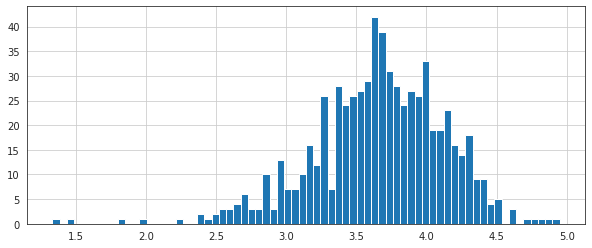

In [ ]:
ratingss = pd.DataFrame(df.groupby('userID')['rating'].mean().sort_values(ascending=False))
ratingss.head()

plt.figure(figsize=(10,4))
ratingss['rating'].hist(bins=70)
                        

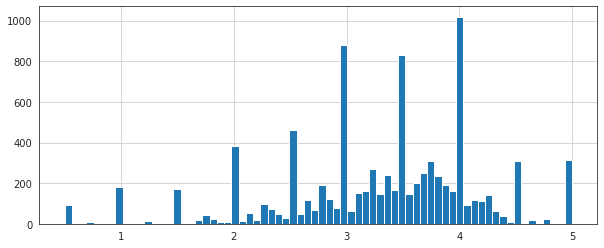

In [ ]:
move = pd.DataFrame(df.groupby('itemID')['rating'].mean().sort_values(ascending=False))
move.head()
plt.figure(figsize=(10,4))
move['rating'].hist(bins=70)

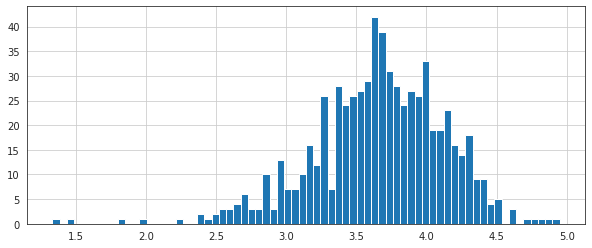

In [ ]:
user = pd.DataFrame(df.groupby('userID')['rating'].mean().sort_values(ascending=False))
user.head()
plt.figure(figsize=(10,4))
user['rating'].hist(bins=70)

In [ ]:
df.groupby('itemID')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,itemID,rating
321,356,341
266,296,324
284,318,311
525,593,304
232,260,291
427,480,274
2062,2571,259
0,1,247
472,527,244
522,589,237


In [ ]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),NMF(), NormalPredictor(), KNNBasic()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.896379,4.891290,0.155550
NMF,0.946462,5.924816,0.169364
KNNBasic,0.969044,0.139568,1.677745
NormalPredictor,1.441359,0.137797,0.167321


In [ ]:

param_grid = {'n_factors': [25, 30, 35,40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

0.8898527843021286
{'n_factors': 35, 'n_epochs': 25, 'lr_all': 0.008, 'reg_all': 0.08}


In [ ]:
trainset, testset = train_test_split(data, test_size=.25)
svd= SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value)
svd.fit(trainset)
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8835


0.883469266587668

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:

def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [ ]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,596,4033,3.5,3.886064,{'was_impossible': False},487,18,0.386064
1,54,26160,3.5,3.438579,{'was_impossible': False},44,1,0.061421
2,195,2202,3.0,3.441408,{'was_impossible': False},485,11,0.441408
3,382,150,3.0,3.464294,{'was_impossible': False},314,200,0.464294
4,294,193,3.0,2.487943,{'was_impossible': False},947,35,0.512057


In [ ]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
18101,46,7153,5.0,5.0,{'was_impossible': False},39,176,0.0
22523,242,913,5.0,5.0,{'was_impossible': False},399,62,0.0
1002,298,31658,5.0,5.0,{'was_impossible': False},75,27,0.0
22522,46,49530,5.0,5.0,{'was_impossible': False},39,37,0.0
21667,298,318,5.0,5.0,{'was_impossible': False},75,311,0.0
8493,287,7153,5.0,5.0,{'was_impossible': False},254,176,0.0
8685,290,2019,5.0,5.0,{'was_impossible': False},67,54,0.0
24950,91,318,5.0,5.0,{'was_impossible': False},150,311,0.0
19674,46,5952,5.0,5.0,{'was_impossible': False},39,188,0.0
15035,46,4993,5.0,5.0,{'was_impossible': False},39,200,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1800,272,119145,0.5,4.030323,{'was_impossible': False},39,13,3.530323
11325,156,1722,0.5,4.037143,{'was_impossible': False},45,49,3.537143
3181,431,920,1.0,4.538012,{'was_impossible': False},268,68,3.538012
17239,595,1289,1.0,4.557328,{'was_impossible': False},163,13,3.557328
16375,568,356,1.0,4.586593,{'was_impossible': False},37,341,3.586593
674,646,955,1.0,4.660293,{'was_impossible': False},169,30,3.660293
2140,198,2973,0.5,4.208076,{'was_impossible': False},75,28,3.708076
24933,480,1028,0.5,4.238428,{'was_impossible': False},378,78,3.738428
1547,156,77561,0.5,4.297366,{'was_impossible': False},45,29,3.797366
356,546,1235,0.5,4.629982,{'was_impossible': False},65,44,4.129982


In [ ]:
df_predictions.loc[df_predictions['iid'] == 1235]['rui'].describe()






count    12.000000
mean      3.875000
std       1.350505
min       0.500000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rui, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 356 to 24722
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rui     12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


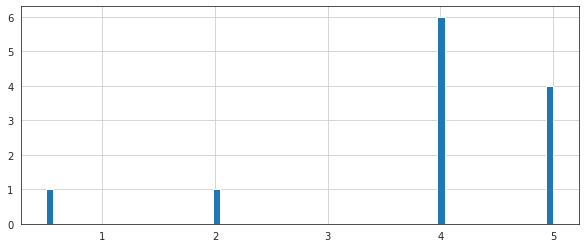

In [ ]:
%matplotlib inline

temp = df_predictions.loc[df_predictions['iid'] == 1235]['rui']
s=pd.Series(temp)
d=s.to_frame()

d.info()

plt.figure(figsize=(10,4))
d['rui'].hist(bins=70)






<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 10107 to 21654
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rui     2 non-null      float64
dtypes: float64(1)
memory usage: 32.0 bytes


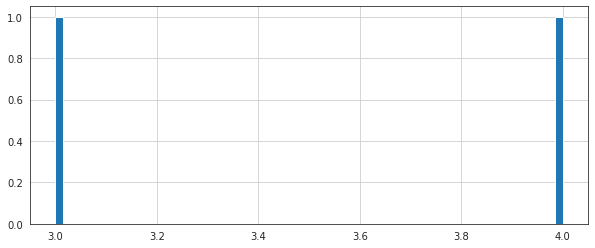

In [ ]:
%matplotlib inline

temp = df_predictions.loc[df_predictions['iid'] == 46]['rui']
s=pd.Series(temp)
d=s.to_frame()
d.info()
plt.figure(figsize=(10,4))
d['rui'].hist(bins=70)


In [ ]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
  tp=0
  fn=0
  fp=0
  tn=0
  temp = []

  for uid, _, true_r, est, _ in predictions:
    if(true_r>=threshold):
      if(est>=threshold):
        tp = tp+1
      else:
        fn = fn+1
    else:
      if(est>=threshold):
        fp = fp+1
      else:
        tn = tn+1   

    if tp == 0:
      precision = 0
      recall = 0
      f1 = 0
    else:
      precision = tp / (tp + fp)
      recall = tp / (tp + fn)
      f1 = 2 * (precision * recall) / (precision + recall)  

  temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
  final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,25001,0,0,0,1.000000,1.000000,1.000000
1,0.5,25001,0,0,0,1.000000,1.000000,1.000000
2,1.0,24724,273,2,2,0.989079,0.999919,0.994469
3,1.5,23888,1098,11,4,0.956055,0.999833,0.977454
4,2.0,23405,1437,96,63,0.942154,0.997315,0.968951
5,2.5,21257,2781,562,401,0.884308,0.981485,0.930366
6,3.0,18546,2427,2033,1995,0.884280,0.902877,0.893482
7,3.5,11015,2857,6588,4541,0.794046,0.708087,0.748607
8,4.0,4544,872,11255,8330,0.838996,0.352959,0.496884
9,4.5,568,228,19102,5103,0.713568,0.100159,0.175661


In [ ]:
def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    #tp = n_rel_and_rec_k
    #fn =  n_rel - tp
    #fp = n_rec_k - tp
    return precisions, recalls
    

In [ ]:
results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.9514925373134329, 'Recall': 0.17245302321834602},
 {'K': 3, 'Precision': 0.9445273631840798, 'Recall': 0.24914820661490272},
 {'K': 4, 'Precision': 0.941542288557214, 'Recall': 0.31796504546197196},
 {'K': 5, 'Precision': 0.9397512437810942, 'Recall': 0.3796458861386673},
 {'K': 6, 'Precision': 0.9358208955223877, 'Recall': 0.43205327727315646},
 {'K': 7, 'Precision': 0.9342217484008517, 'Recall': 0.47988130355918734},
 {'K': 8, 'Precision': 0.9320628997867801, 'Recall': 0.5181941779990626},
 {'K': 9, 'Precision': 0.92868396114665, 'Recall': 0.5510025784007623},
 {'K': 10, 'Precision': 0.9252345415778238, 'Recall': 0.5789662287527582}]

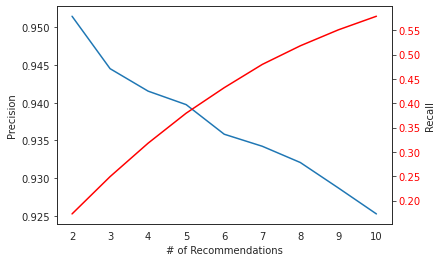

In [ ]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

In [ ]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
trainset = data.build_full_trainset()   #Build on entire data set
algo = SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value)
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

#Predicting the ratings for testset
predictions = algo.test(testset)


In [ ]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
                
    return top_n


In [ ]:
all_pred = get_all_predictions(predictions)



In [ ]:
n = 4
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()


tmp_transpose.head(3)


,0,1,2,3
1,"(926, 3.5143669899553793)","(1147, 3.4951347108562336)","(1217, 3.4943757004408726)","(3030, 3.4937408132627925)"
2,"(969, 4.368901671208965)","(318, 4.367668546840565)","(3030, 4.3674841172508385)","(926, 4.35670393988687)"
3,"(3462, 4.312368432431087)","(5114, 4.303976490785672)","(8132, 4.302255417013004)","(1939, 4.300442396492708)"


In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
user_id=67
results = get_predictions(user_id)
results

0     (858, 4.728225224826817)
1    (1939, 4.709307088737457)
2      (905, 4.69313068486962)
3     (994, 4.677384393650979)
Name: 67, dtype: object

In [ ]:
recommended_movie_ids=[]
for x in range(0, n):
    recommended_movie_ids.append(results[x][0])

recommended_movie_ids

[858, 1939, 905, 994]

In [ ]:
movies = pd.read_csv('/content/drive/My Drive/recommender system/movies.csv')
movies.head()
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
recommended_movies

,movieId,title,genres
840,858,"Godfather, The (1972)",Crime|Drama
884,905,It Happened One Night (1934),Comedy|Romance
972,994,Big Night (1996),Comedy|Drama
1850,1939,"Best Years of Our Lives, The (1946)",Drama|War


In [ ]:
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)
df.head()

,itemID,userID,rating
0,31,1,2.5
1,1029,1,3.0
2,1061,1,3.0
3,1129,1,2.0
4,1172,1,4.0


In [ ]:
temp = df[df['userID'] == 67].sort_values("rating", ascending = False)
temp.head()

,itemID,userID,rating
9712,1097,67,5.0
9635,265,67,5.0
9639,279,67,5.0
9640,280,67,5.0
9641,282,67,5.0


In [ ]:
temp.shape

(103, 3)

In [ ]:
history_movie_ids = temp['itemID']
user_history = movies[movies['movieId'].isin(history_movie_ids)]

In [ ]:
user_history[:n]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,6,Heat (1995),Action|Crime|Thriller
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
15,16,Casino (1995),Crime|Drama


In [ ]:
recommended_movies

,movieId,title,genres
840,858,"Godfather, The (1972)",Crime|Drama
884,905,It Happened One Night (1934),Comedy|Romance
972,994,Big Night (1996),Comedy|Drama
1850,1939,"Best Years of Our Lives, The (1946)",Drama|War
